#House Pricing

In [44]:
import pandas as pd

In [45]:
df=pd.read_csv('/content/Housing_Price (1).csv')

In [46]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [47]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Identify numerical and categorical columns
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Preprocessing: Standardizing numerical features and encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Apply KMeans clustering with a guessed range for clusters (e.g., k=3 for simplicity)
kmeans_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('kmeans', KMeans(n_clusters=3, random_state=0))])

# Fit the model to the data
kmeans_pipeline.fit(df)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans_pipeline['kmeans'].labels_

# Display the clustered data sample
df[['price', 'area', 'bedrooms', 'Cluster']].head()


,price,area,bedrooms,Cluster
0,13300000,7420,4,2
1,12250000,8960,4,2
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,2


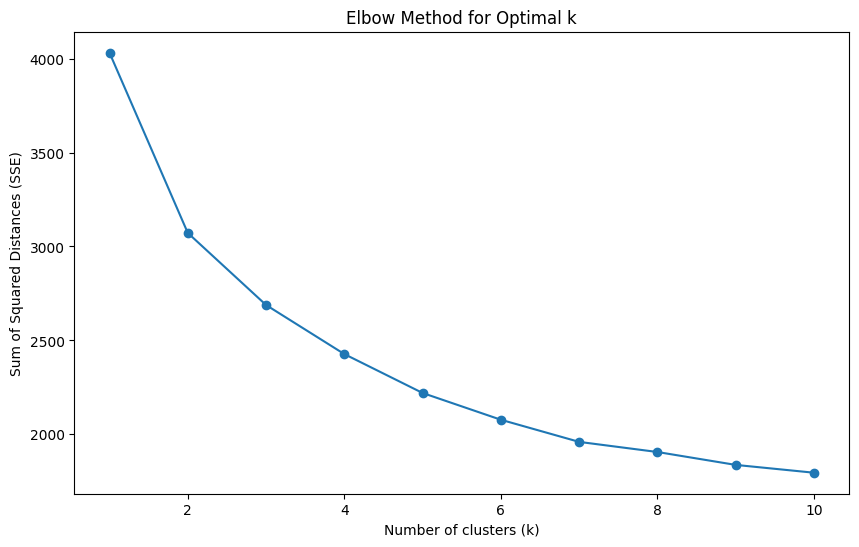

In [48]:
# Elbow method to find the optimal number of clusters (k)
sse = []  # Sum of squared distances for each k
k_range = range(1, 11)

# Calculate SSE for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(preprocessor.fit_transform(df))
    sse.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


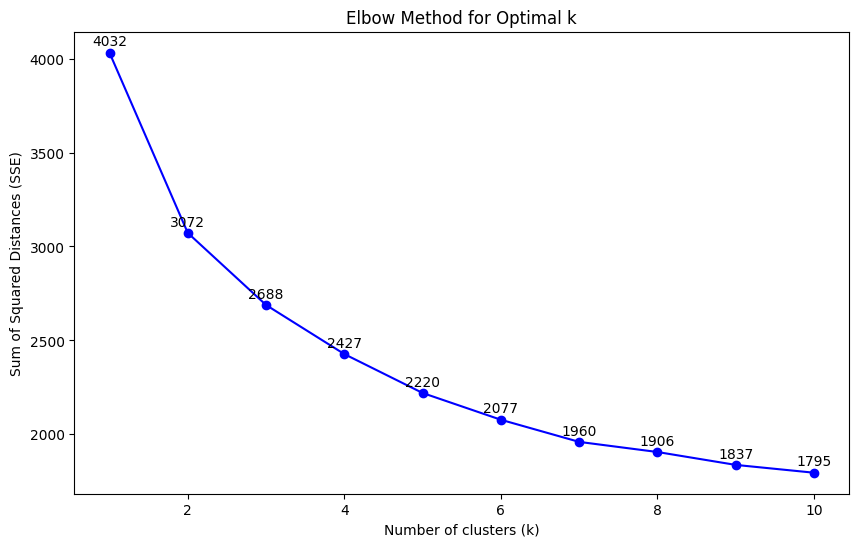

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Define the relevant features in the dataset
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Preprocessing step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Initialize an empty list to store the sum of squared distances for each k
sse = []
k_values = range(1, 11)

# Calculate SSE for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    transformed_data = preprocessor.fit_transform(df)  # Preprocess data
    kmeans.fit(transformed_data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve with annotations
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')

# Annotate each point with its SSE value
for i, txt in enumerate(sse):
    plt.annotate(f'{txt:.0f}', (k_values[i], sse[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()


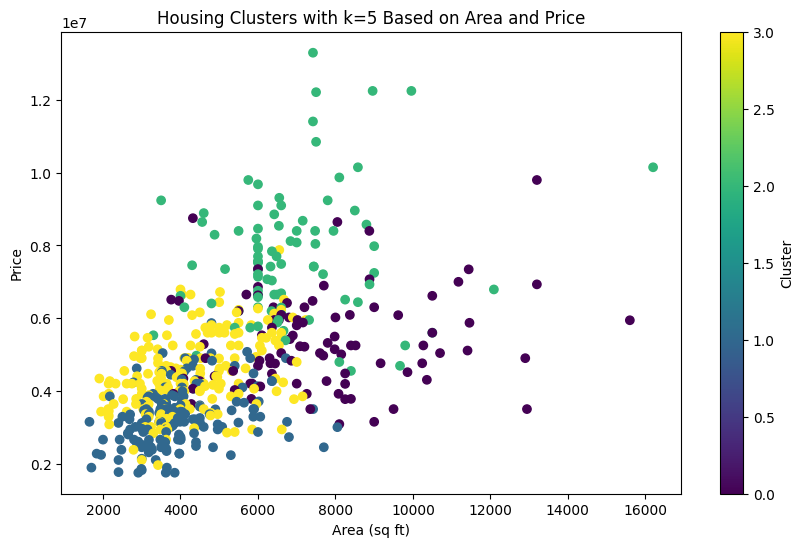

In [50]:
# Fit KMeans with k = 4
kmeans = KMeans(n_clusters=4, random_state=0)
transformed_data = preprocessor.fit_transform(df)
df['Cluster'] = kmeans.fit_predict(transformed_data)

# Plotting clusters based on 'area' and 'price'
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], c=df['Cluster'], cmap='viridis', marker='o')
plt.colorbar(label='Cluster')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Housing Clusters with k=5 Based on Area and Price')
plt.show()


In [51]:
# Retrieve the centroids for the 5 clusters
centroids = kmeans.cluster_centers_

# Inverse transform to get the original scale for interpretability
# Only applies to numerical features, as categorical are one-hot encoded
centroids_original_scale = preprocessor.named_transformers_['num'].inverse_transform(centroids[:, :len(numerical_features)])

# Convert to a DataFrame for better readability
centroid_df = pd.DataFrame(centroids_original_scale, columns=numerical_features)
print("Centroids of each cluster:\n", centroid_df)


Centroids of each cluster:
           price         area  bedrooms  bathrooms   stories   parking
0  5.351989e+06  7589.860215  2.774194   1.086022  1.236559  1.569892
1  3.305531e+06  3949.863636  2.340909   1.034091  1.244318  0.267045
2  7.665741e+06  6845.550562  3.483146   2.000000  2.887640  1.202247
3  4.471166e+06  4260.737968  3.401070   1.283422  2.101604  0.417112


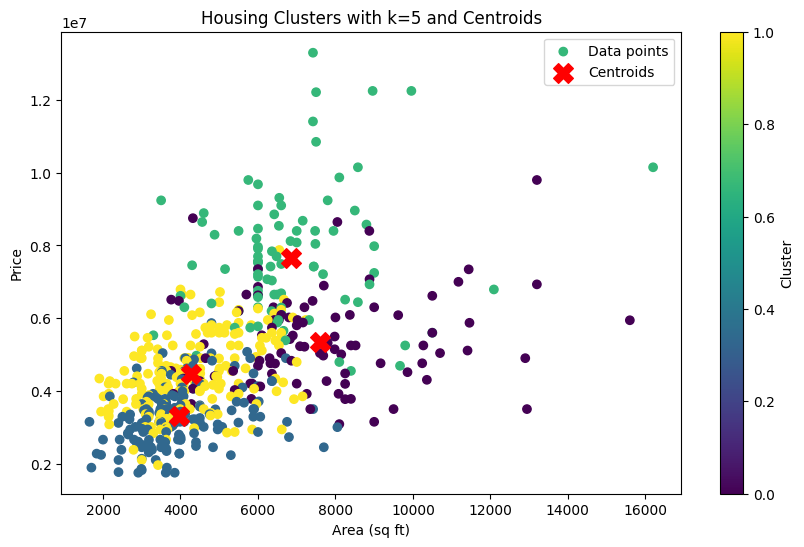

In [53]:
# Fit KMeans with k = 4
kmeans = KMeans(n_clusters=4, random_state=0)
transformed_data = preprocessor.fit_transform(df)
df['Cluster'] = kmeans.fit_predict(transformed_data)

# Retrieve and inverse transform centroids for visualization
centroids = preprocessor.named_transformers_['num'].inverse_transform(kmeans.cluster_centers_[:, :len(numerical_features)])
centroids_df = pd.DataFrame(centroids, columns=numerical_features)

# Plot clusters and centroids based on 'area' and 'price'
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], c=df['Cluster'], cmap='viridis', marker='o', label="Data points")
plt.scatter(centroids_df['area'], centroids_df['price'], c='red', marker='X', s=200, label="Centroids")
plt.colorbar(label='Cluster')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Housing Clusters with k=5 and Centroids')
plt.legend()
plt.show()


In [54]:
# Retrieve centroid values and inverse transform for better interpretability
centroids_original_scale = preprocessor.named_transformers_['num'].inverse_transform(kmeans.cluster_centers_[:, :len(numerical_features)])
centroid_df = pd.DataFrame(centroids_original_scale, columns=numerical_features)
print("Centroids of each cluster:\n", centroid_df)


Centroids of each cluster:
           price         area  bedrooms  bathrooms   stories   parking
0  5.351989e+06  7589.860215  2.774194   1.086022  1.236559  1.569892
1  3.305531e+06  3949.863636  2.340909   1.034091  1.244318  0.267045
2  7.665741e+06  6845.550562  3.483146   2.000000  2.887640  1.202247
3  4.471166e+06  4260.737968  3.401070   1.283422  2.101604  0.417112


# Breast Cancer


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [20]:
# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # This includes the labels (malignant/benign)


In [21]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))


Text(0, 0.5, 'Inertia')

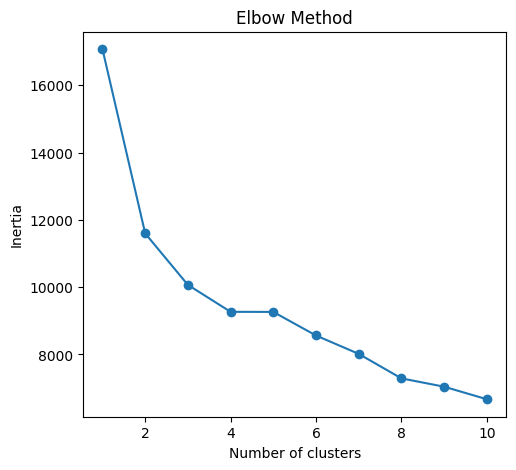

In [25]:
# Elbow method to find optimal number of clusters
inertia = []

range_n_clusters = range(1, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


# Plot inertia
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')




# Wine Quality


In [27]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/Wine_Quality.csv")

# Check for missing values
print(data.isnull().sum())


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [28]:
data_clean = data.dropna()


In [30]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode 'type' column (if categorical)
data_clean['type'] = LabelEncoder().fit_transform(data_clean['type'])

# Drop 'quality' (if clustering without it) and scale features
features = data_clean.drop('quality', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



<ipython-input-30-1d3208d25c52>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['type'] = LabelEncoder().fit_transform(data_clean['type'])


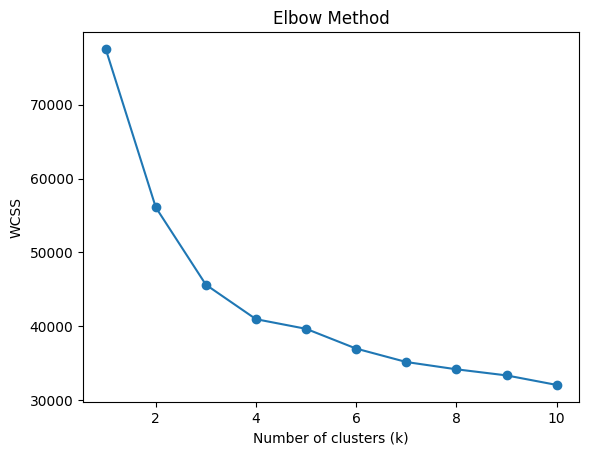

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [55]:
# Perform K-Means with the chosen k (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original data
data_clean['Cluster'] = clusters
print(data_clean.head())


   type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
4     1            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  Cluster  
0       0.45      8.8        6        0  
1       0.49      9.5        6  

<ipython-input-55-d39c6c220705>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cluster'] = clusters


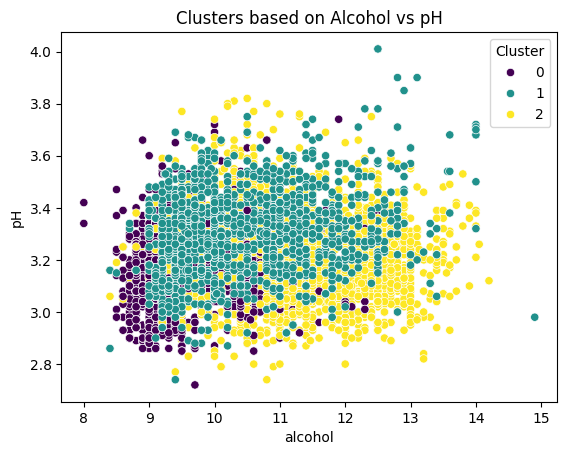

In [56]:
import seaborn as sns

# Example visualization (if using 2 features)
sns.scatterplot(data=data_clean, x='alcohol', y='pH', hue='Cluster', palette='viridis')
plt.title('Clusters based on Alcohol vs pH')
plt.show()


In [57]:
from sklearn.cluster import KMeans

# Apply K-Means with your optimal k value (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original DataFrame
data_clean['Cluster'] = clusters



<ipython-input-57-9229bad41349>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cluster'] = clusters


In [58]:
# Calculate the mean of each feature for each cluster
centroids = data_clean.groupby('Cluster').mean()
print("Cluster Centroids:")
print(centroids)


Cluster Centroids:
             type  fixed acidity  volatile acidity  citric acid  \
Cluster                                                           
0        0.997873       6.974322          0.283075     0.358634   
1        0.004419       8.343497          0.530780     0.270612   
2        0.995997       6.775700          0.274031     0.319176   

         residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
Cluster                                                                         
0             11.189952   0.053310            45.535354            169.863105   
1              2.507355   0.087919            15.704861             45.986742   
2              3.390377   0.040944            28.919947            118.538359   

          density        pH  sulphates    alcohol   quality  
Cluster                                                      
0        0.996988  3.156582   0.493530   9.541946  5.619883  
1        0.996783  3.310764   0.659230  10.404956  5.

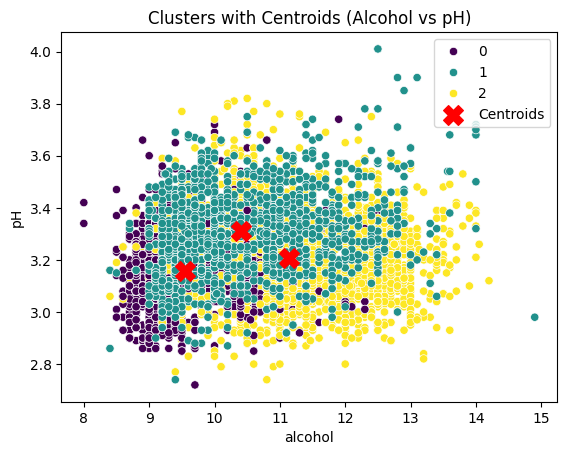

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot clusters (example using 'alcohol' vs 'pH')
sns.scatterplot(data=data_clean, x='alcohol', y='pH', hue='Cluster', palette='viridis', legend='full')

# Plot centroids (cluster means)
plt.scatter(centroids['alcohol'], centroids['pH'], s=200, c='red', marker='X', label='Centroids')

# Add title and legend
plt.title('Clusters with Centroids (Alcohol vs pH)')
plt.legend()
plt.show()


In [60]:
centroids = data_clean.groupby('Cluster').mean()
print("Centroid Values:")
print(centroids)

Centroid Values:
             type  fixed acidity  volatile acidity  citric acid  \
Cluster                                                           
0        0.997873       6.974322          0.283075     0.358634   
1        0.004419       8.343497          0.530780     0.270612   
2        0.995997       6.775700          0.274031     0.319176   

         residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
Cluster                                                                         
0             11.189952   0.053310            45.535354            169.863105   
1              2.507355   0.087919            15.704861             45.986742   
2              3.390377   0.040944            28.919947            118.538359   

          density        pH  sulphates    alcohol   quality  
Cluster                                                      
0        0.996988  3.156582   0.493530   9.541946  5.619883  
1        0.996783  3.310764   0.659230  10.404956  5.62